Predicting Breast caner in a Patient

Importing necessary Libraries

In [113]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.tree import DecisionTreeClassifier

Loading Dataset

In [18]:
cancer = pd.read_csv('cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
#Information of each columns
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
cancer.shape

(569, 33)

In [21]:
cancer.dtypes.value_counts()

float64    31
int64       1
object      1
dtype: int64

In [22]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [23]:
#Deleting unnecessary rows
cancer.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [24]:
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Target Variable

In [25]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [26]:
cancer["diagnosis"]=cancer["diagnosis"].map({"B":1, "M":0})

In [28]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

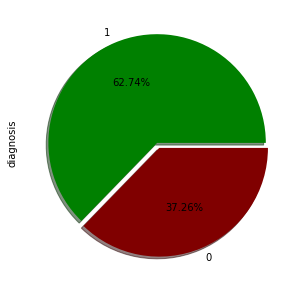

In [34]:
cancer['diagnosis'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.05],
                                       colors = ['Green', 'Maroon'], shadow = True)
plt.show()
     

Checking correlaton of features

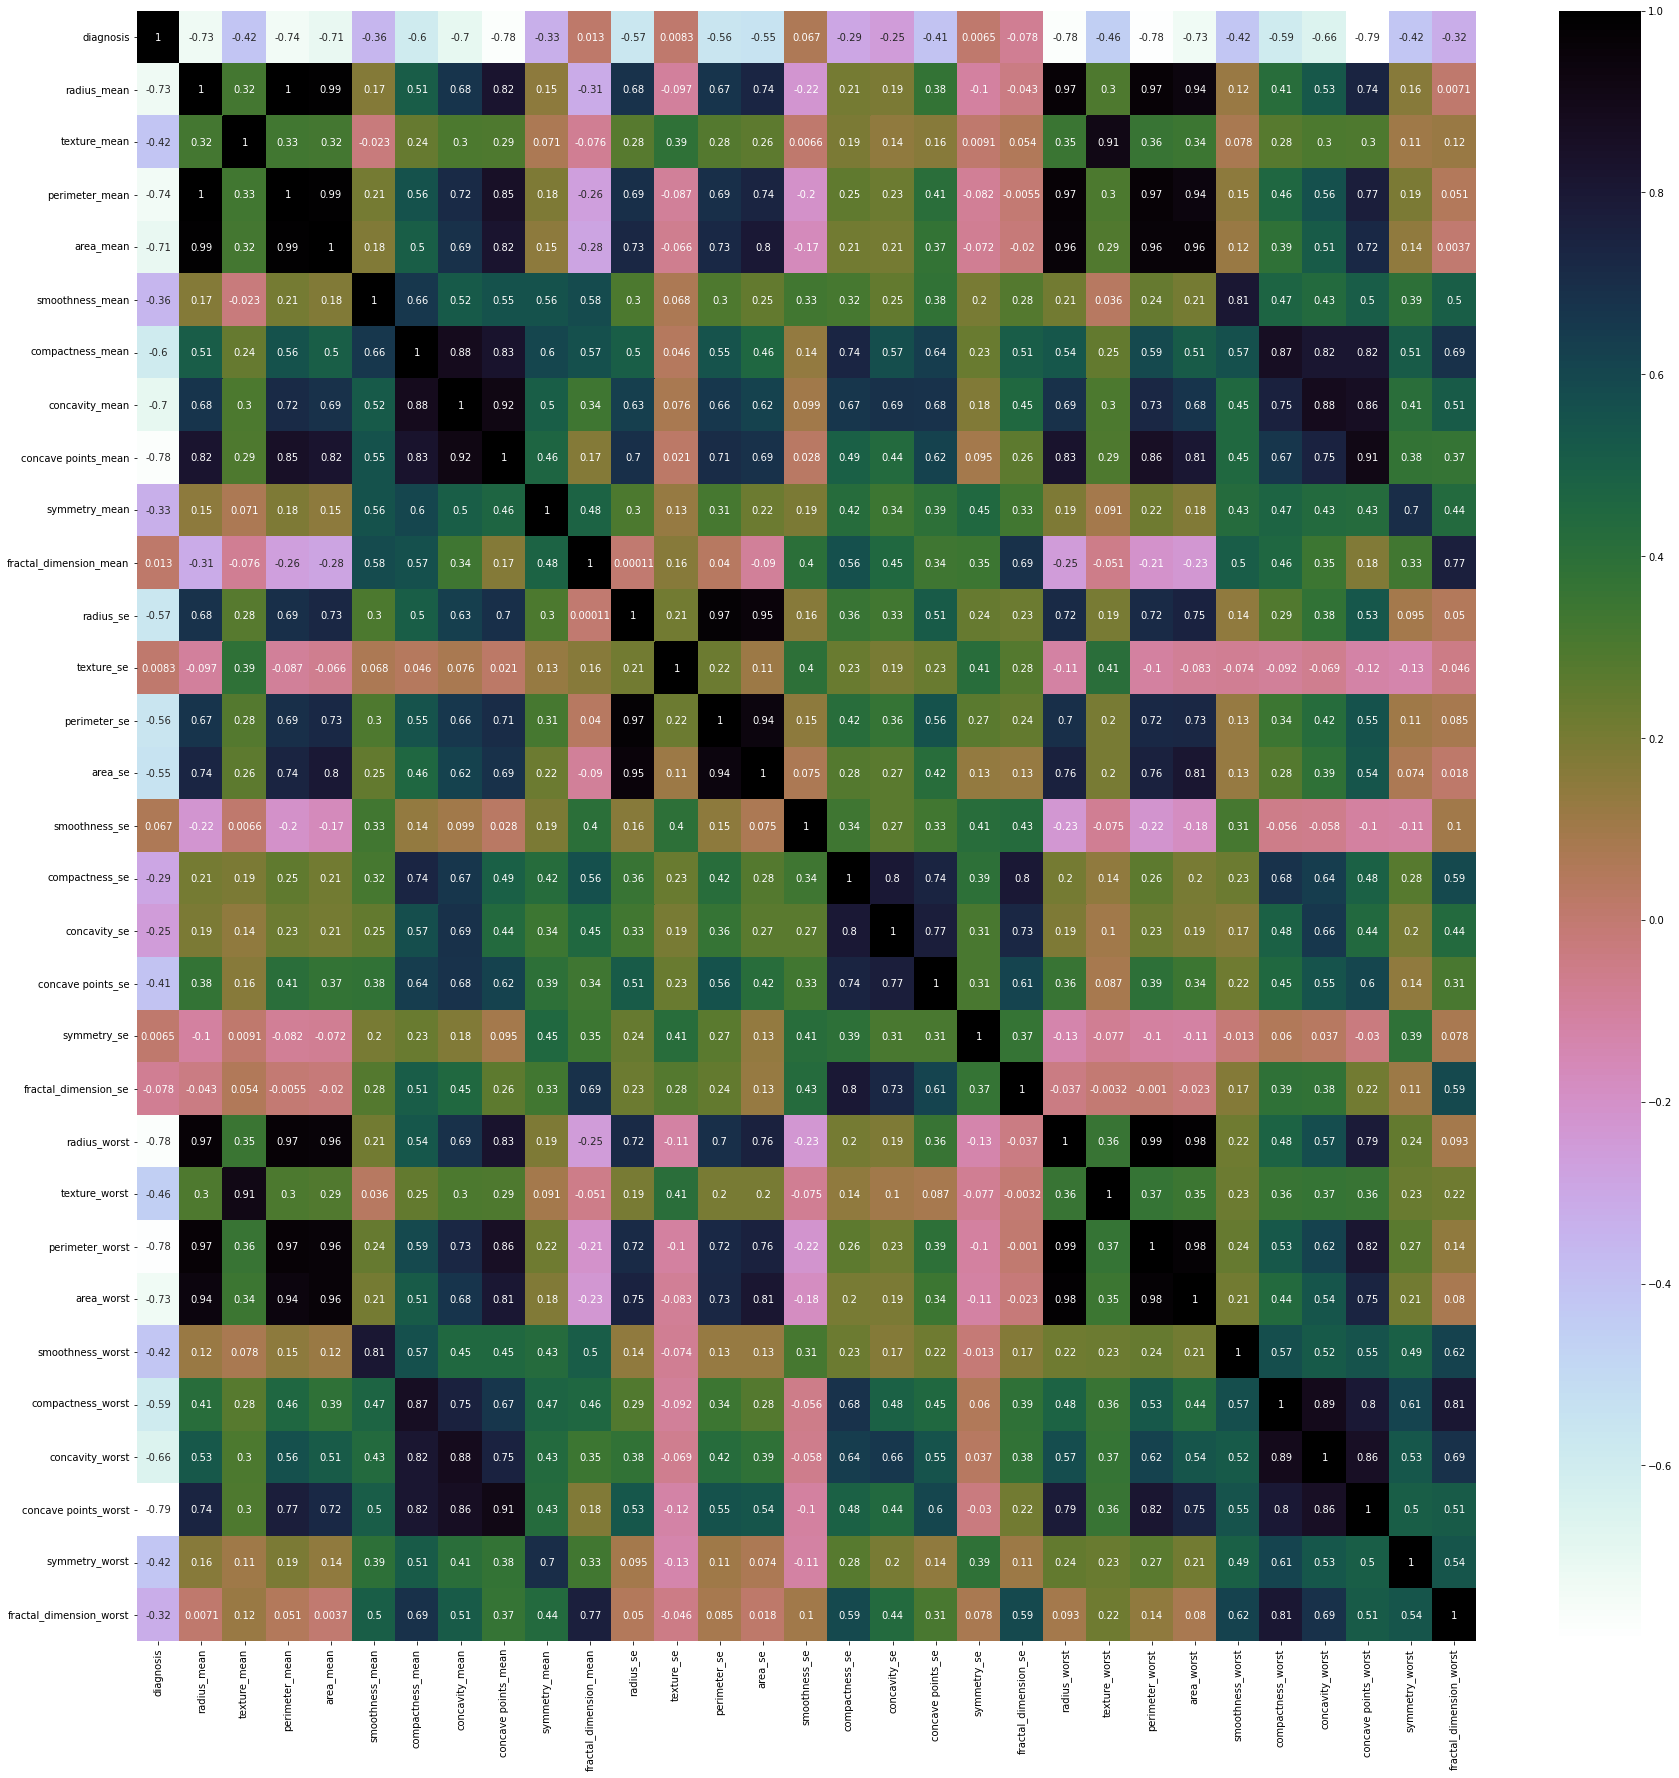

In [36]:
plt.figure(figsize= (30,30))
sns.heatmap(cancer.corr(),annot =True,cmap = 'cubehelix_r')
plt.show()

Feature Seletion

In [43]:
# The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field2 is Mean Radius, field 12 is Radius SE, field 22 is Worst Radius.
# For better model, Let us consider only Mean values to predict
cnr=cancer.iloc[:,0:11]

In [44]:
cnr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [53]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x 

In [51]:
cnr1 = cnr.copy()
cnr1.drop(['diagnosis'], axis = 1, inplace = True)

In [54]:
cnr1 = cnr1.apply(lambda x : outliers(x))

In [55]:
target = cnr['diagnosis']

In [58]:
cnr2 = pd.concat([target,cnr1], axis = 1)
cnr3_d = pd.get_dummies(cnr2, drop_first = True)

In [60]:
cnr3_d

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,17.99000,10.9304,122.8000,1001.000,0.118400,0.277192,0.30010,0.14710,0.241900,0.078710
1,0,20.57000,17.7700,132.9000,1326.000,0.084740,0.078640,0.08690,0.07017,0.181200,0.056670
2,0,19.69000,21.2500,130.0000,1203.000,0.109600,0.159900,0.19740,0.12790,0.206900,0.059990
3,0,11.42000,20.3800,77.5800,386.100,0.132888,0.277192,0.24140,0.10520,0.259564,0.085438
4,0,20.29000,14.3400,135.1000,1297.000,0.100300,0.132800,0.19800,0.10430,0.180900,0.058830
...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56000,22.3900,142.0000,1479.000,0.111000,0.115900,0.24390,0.13890,0.172600,0.056230
565,0,20.13000,28.2500,131.2000,1261.000,0.097800,0.103400,0.14400,0.09791,0.175200,0.055330
566,0,16.60000,28.0800,108.3000,858.100,0.084550,0.102300,0.09251,0.05302,0.159000,0.056480
567,0,20.60000,29.3300,140.1000,1265.000,0.117800,0.277000,0.35140,0.15200,0.239700,0.070160


In [61]:
y = cnr3_d['diagnosis']
x = cnr3_d.drop(columns=['diagnosis'])

In [63]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=1)
print("x_train-shape : ", x_train.shape)
print("y_train-shape : ", y_train.shape)
print("x_test-shape : ", x_test.shape)
print("y_test-shape : ", y_test.shape)

x_train-shape :  (426, 10)
y_train-shape :  (426,)
x_test-shape :  (143, 10)
y_test-shape :  (143,)


Feature scaling

In [66]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

Support Vector Machine

In [101]:
#from sklearn import svm
from sklearn.svm import SVC
model = SVC(kernel='linear', gamma='scale')
model.fit(x_train, y_train) 
y_predsvm = model.predict(x_test)
print(metrics.classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        55
           1       0.93      0.97      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [74]:
df_new = pd.DataFrame({'True_Target': y_test, 'Predicted_target': y_pred})
df_new

,True_Target,Predicted_target
421,1,1
47,0,0
292,1,1
186,0,0
414,0,0
...,...,...
232,1,1
413,1,0
514,0,1
244,0,0


Random Forest 


In [90]:
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(x_train, y_train) # Training the model on the training dataset & fit function is used to train the model using the training sets as parameters
y_predrf = clf.predict(x_test)# performing predictions on the test dataset 
print( metrics.classification_report(y_test, y_predrf))# using metrics module for accuracy calculation


              precision    recall  f1-score   support

           0       0.91      0.89      0.90        55
           1       0.93      0.94      0.94        88

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



Ada Boost Classifier

In [98]:
# Create adaboost classifer object
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(x_train, y_train)
y_predabc = model.predict(x_test)
print( metrics.classification_report(y_test, y_predabc))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        55
           1       0.95      0.93      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



Decision Tree classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 22)
model = dtree.fit(x_train,y_train)
y_preddt = model.predict(x_test)
print( metrics.classification_report(y_test, y_preddt))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        55
           1       0.92      0.94      0.93        88

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



Model Summary

In [111]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " SVM ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_predsvm),
                 'Precision Score': metrics.precision_score(y_test, y_predsvm),
                 'Recall Score': metrics.recall_score(y_test, y_predsvm),
                 'F1 Score' : metrics.f1_score(y_test, y_predsvm),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_predsvm)})
tmp2 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_predrf),
                 'Precision Score': metrics.precision_score(y_test, y_predrf),
                 'Recall Score': metrics.recall_score(y_test, y_predrf),
                 'F1 Score' : metrics.f1_score(y_test, y_predrf),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_predrf)})
tmp3 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_predabc),
                 'Precision Score': metrics.precision_score(y_test, y_predabc),
                 'Recall Score': metrics.recall_score(y_test, y_predabc),
                 'F1 Score' : metrics.f1_score(y_test, y_predabc),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_predabc)})
tmp4 = pd.Series({'Model': " Bagging Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_preddt),
                 'Precision Score': metrics.precision_score(y_test, y_preddt),
                 'Recall Score': metrics.recall_score(y_test, y_preddt),
                 'F1 Score' : metrics.f1_score(y_test, y_preddt),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_preddt)})


model_rf_report1 = model_report.append(tmp1, ignore_index= True)
model_rf_report2 = model_report.append(tmp2, ignore_index= True)
model_rf_report3 = model_report.append(tmp3, ignore_index= True)
model_rf_report4 = model_report.append(tmp4, ignore_index= True)

cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','F1 Score', 'Accuracy Score']
model = pd.DataFrame(columns = cols)
model = model.append([model_rf_report1,model_rf_report2,model_rf_report3,model_rf_report4], ignore_index = True)
model

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,SVM,0.928409,0.934066,0.965909,0.949721,0.937063
1,Random Forest Classifier,0.917045,0.932584,0.943182,0.937853,0.923077
2,Adaboost Classifier,0.929545,0.953488,0.931818,0.942529,0.930070
3,Bagging Classifier,0.907955,0.922222,0.943182,0.932584,0.916084
